In [494]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [495]:
def f(x):
    return 3*x**2 - 4*x + 5

In [496]:
f(3.0)

20.0

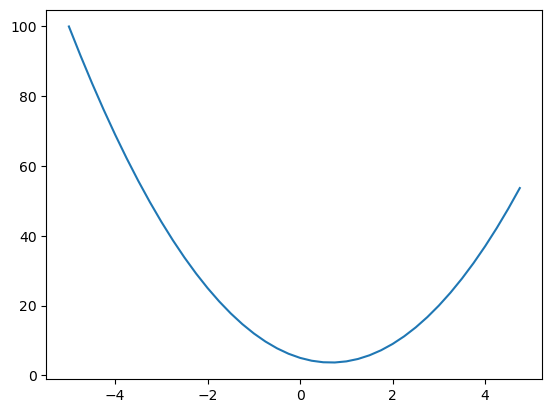

In [497]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [498]:
h = 0.00000000001
x = 2/3
(f(x + h) - f(x)) / h

0.0

In [499]:
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [500]:
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)


d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


In [687]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
            
        out._backward = _backward
        
        return out
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __radd__(self, other): # other + self
        return self + other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other. data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
            
        out._backward = _backward
        
        return out
    
    def __rmul__(self, other): # other * self
        return self * other
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')
                    
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
            
        out._backward = _backward
        
        return out
    
    def __truediv__(self, other): # self / other
        return self * other**-1
    
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
            
        out._backward = _backward
        
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
            
        out._backward = _backward
        
        return out
    
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
            

In [697]:
a = Value(2.0)
b = Value(4.0)
a / b
a - b

Value(data = -2.0)

In [ ]:
!pip install graphviz

In [ ]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right
  
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [ ]:
f.grad = 4.0
d.grad = -2
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

In [ ]:
L.grad = 1.0

In [ ]:
draw_dot(L)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

In [ ]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd' 
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0 , label = 'a')
    b = Value(-3.0 + h, label = 'b')
    c = Value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd' 
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data
    
    print((L2 - L1) / h)

lol()

In [ ]:
plt.plot((np.arange(-5, 5, 0.2)), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

In [ ]:
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x2w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'output'

In [ ]:
draw_dot(o)

In [ ]:
o.backward()

In [ ]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()
x1w1._backward()

In [ ]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [ ]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [ ]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [ ]:
n.grad = 0.5

In [ ]:
o.grad = 1.0

In [ ]:
1 - o.data**2

In [ ]:
# o = tanh(n)
# do/dn = 1 - o**2

In [ ]:
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [ ]:
# inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1w1 + x2w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ---- (breakdown of tanh, yields the same output)
e = (2 * n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'output'
o.backward()

In [ ]:
draw_dot(o)

In [699]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB 660.6 kB/s eta 0:04:52
   ---------------------------------------- 0.0/192.3 MB 393.8 kB/s eta 0:08:09
   ---------------------------------------- 0.1/192.3 MB 409.6 kB/s eta 0:07:50
   ---------------------------------------- 0.1/192.3 MB 438.1 kB/s eta 0:07:19
   ---------------------------------------- 0.1/192.3 MB 516.7 kB/s eta 0:06:12
   ---------------------------------------- 0.2/192.3 MB 655.9 kB/s eta 0:04:53
   ---------------------------------------- 0.2/192.3 MB 718.0 kB/s eta 0:04:28
   -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [705]:
import torch

ModuleNotFoundError: No module named 'torch'

In [708]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

NameError: name 'torch' is not defined

In [ ]:
import random

In [551]:
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]


class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [552]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data = 0.011906397317292428)

In [553]:
n.parameters()

[Value(data = -0.8365316862435945),
 Value(data = 0.760603256980773),
 Value(data = -0.18342994133489565),
 Value(data = 0.13150918226480646),
 Value(data = 0.3537754742447454),
 Value(data = -0.17111722714532052),
 Value(data = -0.08122887268178114),
 Value(data = -0.6753914984793563),
 Value(data = -0.714546865670636),
 Value(data = -0.2841759832236095),
 Value(data = 0.138917216894189),
 Value(data = -0.25682889706112966),
 Value(data = -0.7613941425139317),
 Value(data = 0.7214208727409053),
 Value(data = 0.9504335045141266),
 Value(data = 0.8505259111815826),
 Value(data = 0.8551960136974626),
 Value(data = 0.07974977187530752),
 Value(data = -0.6684478028239658),
 Value(data = -0.7441200521498585),
 Value(data = -0.007350686590511746),
 Value(data = -0.2921125011046717),
 Value(data = -0.16619811693104536),
 Value(data = 0.10787065456657974),
 Value(data = -0.6783431115174114),
 Value(data = 0.0740522529103973),
 Value(data = 0.37310083821477824),
 Value(data = 0.4872322562278357

In [ ]:
draw_dot(n(x))

In [555]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data = 0.011906397317292428),
 Value(data = 0.3112426778486048),
 Value(data = 0.26666698530093785),
 Value(data = 0.1806155550682316)]

In [642]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data = 5.907051680739975)

## forward pass

In [662]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data = 2.158038255246779)

## backward pass

In [663]:
loss.backward()

In [640]:
n.layers[0].neurons[0].w[0].grad

0.7719399280080725

In [ ]:
# draw_dot(loss)

In [568]:
n.layers[0].neurons[0].w[0].data

-0.8519704848037559

## update 

In [664]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [652]:
ypred

[Value(data = 0.17137857299473339),
 Value(data = -0.3180728978288583),
 Value(data = 0.1378350351954708),
 Value(data = 0.04427841453719057)]

In [672]:
ypred

[Value(data = 0.6698242267780483),
 Value(data = -0.6042986599520765),
 Value(data = 0.2979568396980803),
 Value(data = 0.5442032187593739)]

In [684]:
for k in range(20):
    
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    
    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    
    # update (gradient-descent)
    for p in n.parameters():
        p.data += -0.05 * p.grad
    
    print(k, loss.data)

0 9.400746541890172e-15
1 9.400746541890172e-15
2 9.400746541890172e-15
3 9.400746541890172e-15
4 9.400746541890172e-15
5 9.400746541890172e-15
6 9.400746541890172e-15
7 9.400746541890172e-15
8 9.400746541890172e-15
9 9.400746541890172e-15
10 9.400746541890172e-15
11 9.400746541890172e-15
12 9.400746541890172e-15
13 9.400746541890172e-15
14 9.400746541890172e-15
15 9.400746541890172e-15
16 9.400746541890172e-15
17 9.400746541890172e-15
18 9.400746541890172e-15
19 9.400746541890172e-15


In [675]:
ypred

[Value(data = 0.9999999999971313),
 Value(data = -0.9999999999572667),
 Value(data = -0.9999999999999978),
 Value(data = 0.9999997617759181)]